# Разведочный анализ датасета

In [15]:
# import necessary libraries 
from pyspark.sql import SparkSession 

# Create Spark Session 
sparkSession = SparkSession.builder.appName('g1').getOrCreate() 
MAX_MEMORY = '15G'


# Create Spark DataFrame 
df = sparkSession.read.csv( 
    'itineraries.csv',
    header=True, 
    inferSchema=True
).limit(50000)


# Print Dataframe 
df_pandas = df.limit(100).toPandas()
print(df_pandas) 


                               legId  searchDate  flightDate startingAirport  \
0   9ca0e81111c683bec1012473feefd28f  2022-04-16  2022-04-17             ATL   
1   98685953630e772a098941b71906592b  2022-04-16  2022-04-17             ATL   
2   98d90cbc32bfbb05c2fc32897c7c1087  2022-04-16  2022-04-17             ATL   
3   969a269d38eae583f455486fa90877b4  2022-04-16  2022-04-17             ATL   
4   980370cf27c89b40d2833a1d5afc9751  2022-04-16  2022-04-17             ATL   
..                               ...         ...         ...             ...   
95  b8632c8d6306eefa042de33dd303fc21  2022-04-16  2022-04-17             ATL   
96  a5e3ac25a2a23b16e9a7c82eb3dbe5c6  2022-04-16  2022-04-17             ATL   
97  46cab91070ddf01f23ad6d59600c2bff  2022-04-16  2022-04-17             ATL   
98  b8227b6368a7bc1c8d83591695af18cb  2022-04-16  2022-04-17             ATL   
99  2bcf2f66e9c0d933d452ab9941adf829  2022-04-16  2022-04-17             ATL   

   destinationAirport fareBasisCode tra

## Полная схема датасета

In [16]:
# Print Schema 
df.printSchema() 

root
 |-- legId: string (nullable = true)
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: boolean (nullable = true)
 |-- isRefundable: boolean (nullable = true)
 |-- isNonStop: boolean (nullable = true)
 |-- baseFare: double (nullable = true)
 |-- totalFare: double (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: s

## Удаление избыточных столбцов датасета

In [17]:
# Список столбцов для удаления
columns_to_drop = [
    "segmentsDepartureTimeEpochSeconds",
    "segmentsDepartureTimeRaw",
    "segmentsArrivalTimeEpochSeconds",
    "segmentsArrivalTimeRaw",
    "segmentsArrivalAirportCode",
    "segmentsDepartureAirportCode",
    "segmentsAirlineName",
    "segmentsAirlineCode",
    "segmentsEquipmentDescription",
    "segmentsDurationInSeconds",
    "segmentsDistance",
    "segmentsCabinCode",
    "searchDate",
    "FareBasisCode",
    "flightDate"
]

# Удаление столбцов
df = df.drop(*columns_to_drop)

# Print Schema 
df.printSchema() 

root
 |-- legId: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: boolean (nullable = true)
 |-- isRefundable: boolean (nullable = true)
 |-- isNonStop: boolean (nullable = true)
 |-- baseFare: double (nullable = true)
 |-- totalFare: double (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)



## Преобразование категориальных переменных

In [18]:
'''

from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Список категориальных переменных, которые мы хотим преобразовать
categorical_columns = ['startingAirport', 'destinationAirport']

# Создание экземпляра StringIndexer для каждой категориальной переменной
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="skip") for col in categorical_columns]

# Создание экземпляра OneHotEncoder для каждой категориальной переменной
encoders = [OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encoded") for col in categorical_columns]

# Создание пайплайна для преобразования данных
pipeline = Pipeline(stages=indexers + encoders)
model = pipeline.fit(df)
df = model.transform(df)

# Удаление исходных столбцов и замена их новыми столбцами
for col in categorical_columns:
    df = df.drop(col).withColumnRenamed(f"{col}_encoded", col)


# Print Schema 
df.printSchema() 

'''

'\n\nfrom pyspark.ml.feature import StringIndexer, OneHotEncoder\nfrom pyspark.ml import Pipeline\n\n# Список категориальных переменных, которые мы хотим преобразовать\ncategorical_columns = [\'startingAirport\', \'destinationAirport\']\n\n# Создание экземпляра StringIndexer для каждой категориальной переменной\nindexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="skip") for col in categorical_columns]\n\n# Создание экземпляра OneHotEncoder для каждой категориальной переменной\nencoders = [OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encoded") for col in categorical_columns]\n\n# Создание пайплайна для преобразования данных\npipeline = Pipeline(stages=indexers + encoders)\nmodel = pipeline.fit(df)\ndf = model.transform(df)\n\n# Удаление исходных столбцов и замена их новыми столбцами\nfor col in categorical_columns:\n    df = df.drop(col).withColumnRenamed(f"{col}_encoded", col)\n\n\n# Print Schema \ndf.printSchema() \n\n'

## Приведение бинарных переменных к численному виду

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

columns = ["isBasicEconomy", "isRefundable", "isNonStop"]

# Замена значений True на 1 и False на 0
boolean_columns = ["isBasicEconomy", "isRefundable", "isNonStop"]

for col_name in boolean_columns:
    df = df.withColumn(col_name, (col(col_name) == "true").cast("int"))

# Print Schema 
df.printSchema() 

root
 |-- legId: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: integer (nullable = true)
 |-- isRefundable: integer (nullable = true)
 |-- isNonStop: integer (nullable = true)
 |-- baseFare: double (nullable = true)
 |-- totalFare: double (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)



## Приведение даты к секундам

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr
import re
from pyspark.sql.functions import udf
from pyspark.sql.types import *

columns = ["category", "travelDuration"]

# Функция для преобразования формата PT3H21M в секунды с использованием регулярных выражений
def parse_travel_duration(duration):
    match = re.match(r'PT(\d+)H(\d+)M', duration)
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        return hours * 3600 + minutes * 60
    else:
        return None  # В случае некорректного формата возвращаем None

# Создание пользовательской функции и регистрация ее в Spark
parse_travel_duration_udf = udf(parse_travel_duration, IntegerType())
df = df.withColumn("travelDurationInSeconds", parse_travel_duration_udf("travelDuration"))

# Удаление столбца "travelDuration"
df = df.drop("travelDuration")

# Print Schema 
df.printSchema() 


# Вывод первых 5 строк столбца travelDurationInSeconds
df.select("travelDurationInSeconds").show(5)


root
 |-- legId: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: integer (nullable = true)
 |-- isRefundable: integer (nullable = true)
 |-- isNonStop: integer (nullable = true)
 |-- baseFare: double (nullable = true)
 |-- totalFare: double (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)
 |-- travelDurationInSeconds: integer (nullable = true)

+-----------------------+
|travelDurationInSeconds|
+-----------------------+
|                   8940|
|                   9000|
|                   9000|
|                   9120|
|                   9240|
+-----------------------+
only showing top 5 rows



## Удаление пропущенных значений

In [21]:
# Проверка пропущенных значений в каждом столбце
for column in df.columns:
    print(f"Missing values in {column}: {df.filter(df[column].isNull()).count()}")

Missing values in legId: 0
Missing values in startingAirport: 0
Missing values in destinationAirport: 0
Missing values in elapsedDays: 0
Missing values in isBasicEconomy: 0
Missing values in isRefundable: 0
Missing values in isNonStop: 0
Missing values in baseFare: 0
Missing values in totalFare: 0
Missing values in seatsRemaining: 0
Missing values in totalTravelDistance: 2411
Missing values in travelDurationInSeconds: 970


In [22]:
# Удаление строк с пропущенными значениями
df = df.na.drop()

for column in df.columns:
    print(f"Missing values in {column}: {df.filter(df[column].isNull()).count()}")

Missing values in legId: 0
Missing values in startingAirport: 0
Missing values in destinationAirport: 0
Missing values in elapsedDays: 0
Missing values in isBasicEconomy: 0
Missing values in isRefundable: 0
Missing values in isNonStop: 0
Missing values in baseFare: 0
Missing values in totalFare: 0
Missing values in seatsRemaining: 0
Missing values in totalTravelDistance: 0
Missing values in travelDurationInSeconds: 0


## Поиск и устранение выбросов

In [23]:
numeric_columns = ['elapsedDays', 'totalFare', 'seatsRemaining', 'totalTravelDistance', 'travelDurationInSeconds']
outlier_threshold = 1.5
def count_outliers(df, column):
    quantiles = df.approxQuantile(column, [0.25, 0.75], 0.01)
    lower_bound = quantiles[0] - outlier_threshold * (quantiles[1] - quantiles[0])
    upper_bound = quantiles[1] + outlier_threshold * (quantiles[1] - quantiles[0])
    outliers_count = df.filter((col(column) < lower_bound) | (col(column) > upper_bound)).count()
    outliers_df = df.filter((col(column) < lower_bound) | (col(column) > upper_bound))
    df_without_ouliers = df.filter((col(column) >= lower_bound) & (col(column) <= upper_bound))
    return outliers_df, outliers_count, df_without_ouliers
outliers_stats = {}
for column in numeric_columns:
    outliers_df, outliers_count, df_without_ouliers = count_outliers(df, column)
    outliers_stats[column] = outliers_count
for column, count in outliers_stats.items():
    print(f"Количество выбросов для {column}: {count}")


Количество выбросов для elapsedDays: 5789
Количество выбросов для totalFare: 1562
Количество выбросов для seatsRemaining: 0
Количество выбросов для totalTravelDistance: 0
Количество выбросов для travelDurationInSeconds: 806


## Описательная статистика

In [24]:
import pandas as pd

# Предполагая, что у вас уже есть переменная df, содержащая ваш DataFrame
selected_columns = ["elapsedDays", "baseFare", "totalFare", "seatsRemaining", "totalTravelDistance", "travelDurationInSeconds"]
summary = df.select(selected_columns).summary()

# Преобразование DataFrame PySpark в Pandas DataFrame
summary_pandas = summary.toPandas()

# Вывод Pandas DataFrame
print(summary_pandas)

  summary          elapsedDays            baseFare          totalFare  \
0   count                46684               46684              46684   
1    mean  0.12400394139319681   319.1695553080046  365.0354701822775   
2  stddev  0.32958957935345556  196.71072444533604  212.8238451587144   
3     min                    0                38.5              55.99   
4     25%                    0               200.0              234.6   
5     50%                    0              293.02              337.6   
6     75%                    0              388.83              441.1   
7     max                    1             3531.16             3810.6   

       seatsRemaining totalTravelDistance travelDurationInSeconds  
0               46684               46684                   46684  
1  4.8876702938908405  1590.3327906777483      24206.808756747494  
2  2.8309364089553735   802.5604969590372      11748.090456588614  
3                   1                 185                    4020  
4 

## Визуализация признаков

In [25]:
# Определение уникальных значений
unique_values = df.select("isBasicEconomy").distinct().rdd.map(lambda row: row[0]).collect()

# Вывод результатов
print("Уникальные значения в столбце isBasicEconomy:", unique_values)

# Определение уникальных значений
unique_values = df.select("isRefundable").distinct().rdd.map(lambda row: row[0]).collect()

# Вывод результатов
print("Уникальные значения в столбце isRefundable:", unique_values)

# Определение уникальных значений
unique_values = df.select("elapsedDays").distinct().rdd.map(lambda row: row[0]).collect()

# Вывод результатов
print("Уникальные значения в столбце elapsedDays:", unique_values)

Уникальные значения в столбце isBasicEconomy: [1, 0]
Уникальные значения в столбце isRefundable: [1, 0]
Уникальные значения в столбце elapsedDays: [1, 0]


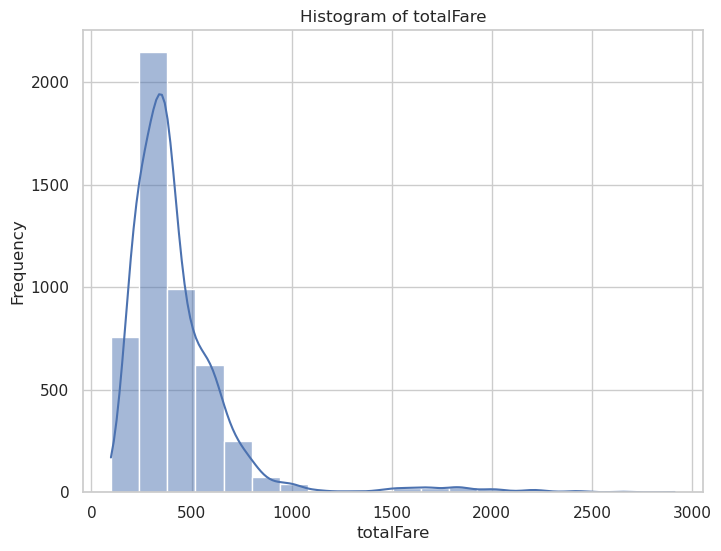

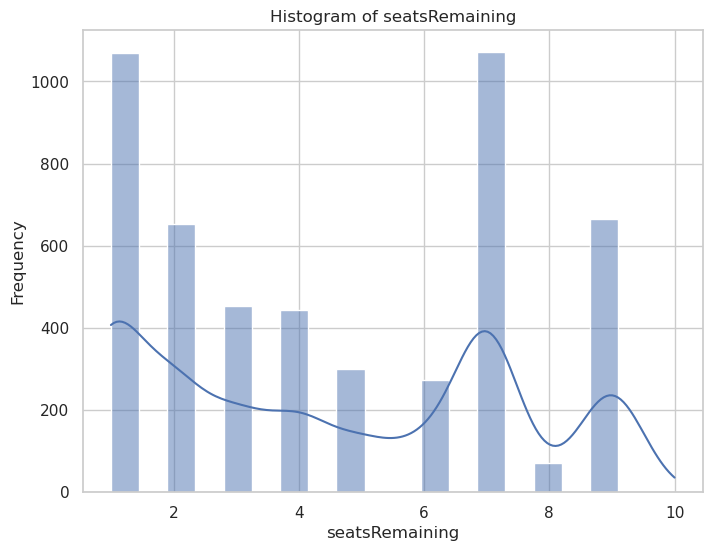

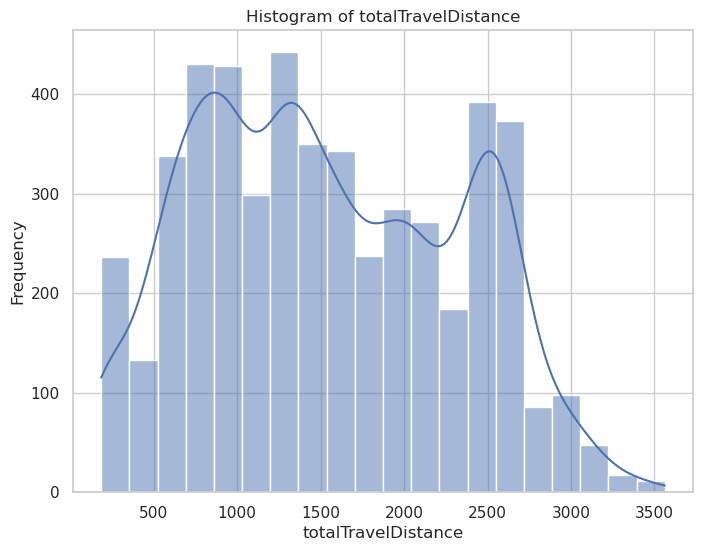

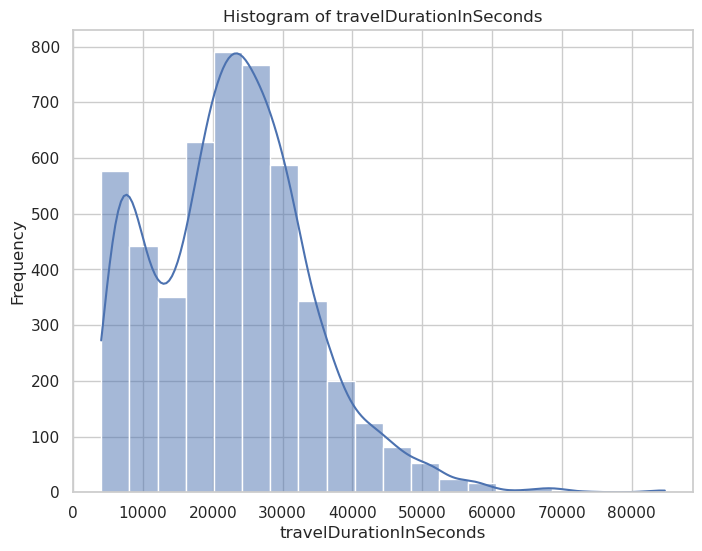

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['totalFare', 'seatsRemaining', 'totalTravelDistance', 'travelDurationInSeconds']

df_pandas = df.limit(5000).toPandas()

# Установка стиля Seaborn
sns.set(style="whitegrid")

# Создание графиков с использованием Seaborn
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_pandas[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


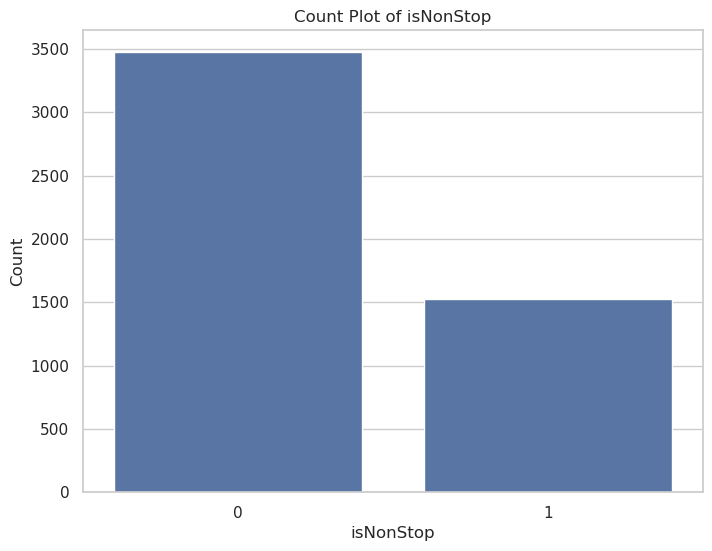

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

binary_columns = ['isNonStop']

# Преобразование данных Spark DataFrame в Pandas DataFrame
df_pandas = df.select(binary_columns).limit(5000).toPandas()

# Установка стиля Seaborn
sns.set(style="whitegrid")

# Создание графиков с использованием Seaborn
for column in binary_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_pandas)
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [29]:
from pyspark.sql.functions import when
df = df.withColumn("isLongTravel", when(df["totalTravelDistance"] > 1350, 1).otherwise(0))

## Тепловая карта корреляций

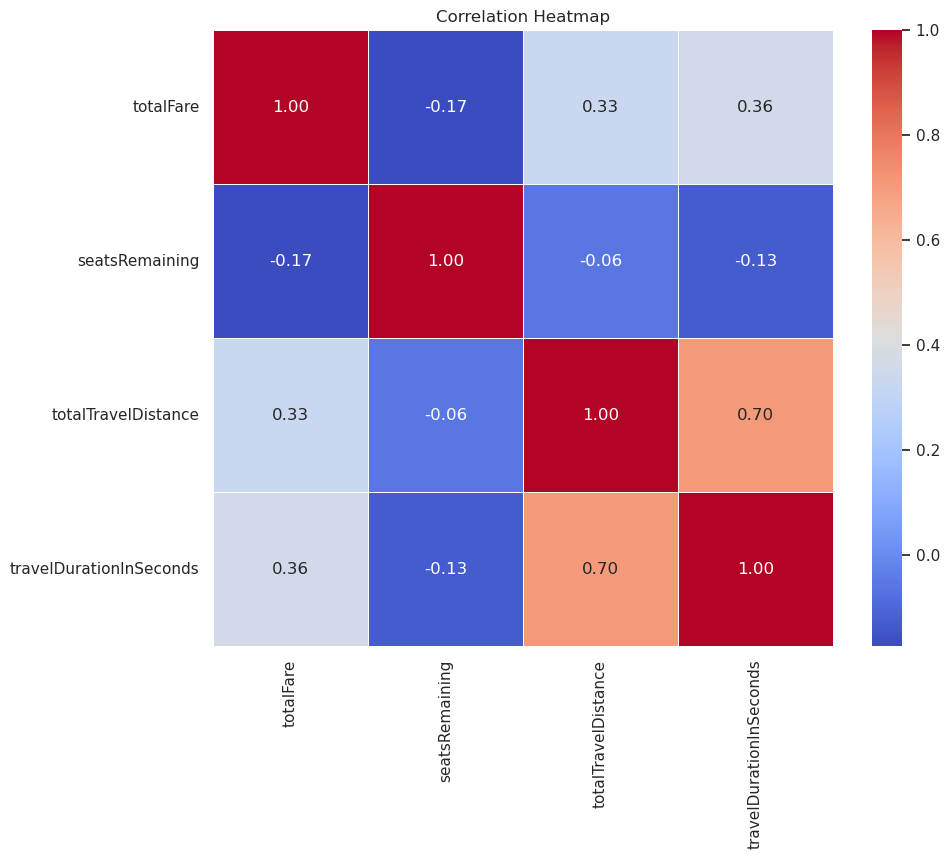

In [30]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['totalFare', 'seatsRemaining', 'totalTravelDistance', 'travelDurationInSeconds']

# Создаем вектор признаков из числовых столбцов
vec_assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
df_assembled = vec_assembler.transform(df)

# Вычисляем матрицу корреляции
correlation_matrix = Correlation.corr(df_assembled, "features").head()

# Преобразуем матрицу корреляции в Pandas DataFrame для построения графика
correlation_matrix = correlation_matrix[0].toArray()
correlation_matrix_pd = pd.DataFrame(correlation_matrix, columns=numeric_columns, index=numeric_columns)

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pd, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# RandomForest с StringIndexer

In [31]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

# Преобразование категориальных переменных
categorical_cols = ["startingAirport", "destinationAirport"]
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep") for col in categorical_cols]

# Сборка признаков в вектор
feature_cols = [
    "isNonStop",
    "seatsRemaining",
    "totalTravelDistance",
    "travelDurationInSeconds",
    "startingAirport_index",
    "destinationAirport_index",
]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Создание модели RandomForestRegressor
rf = RandomForestRegressor(featuresCol="features", labelCol="totalFare")

# Создание Pipeline
pipeline = Pipeline(stages=indexers + [assembler, rf])

# Разделение данных на обучающий и тестовый наборы
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

test_data.show()

# Обучение модели
model = pipeline.fit(train_data)

# Прогнозирование на тестовых данных
predictions = model.transform(test_data)

# Оценка качества модели (RMSE, MSE, R², MAE)
evaluator_rmse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="mse")
evaluator_r2 = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="mae")

rmse = evaluator_rmse.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)

# Вывод результатов
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² (R-squared): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


+--------------------+---------------+------------------+-----------+--------------+------------+---------+--------+---------+--------------+-------------------+-----------------------+------------+
|               legId|startingAirport|destinationAirport|elapsedDays|isBasicEconomy|isRefundable|isNonStop|baseFare|totalFare|seatsRemaining|totalTravelDistance|travelDurationInSeconds|isLongTravel|
+--------------------+---------------+------------------+-----------+--------------+------------+---------+--------+---------+--------------+-------------------+-----------------------+------------+
|00047d826754b299b...|            ORD|               DEN|          0|             0|           0|        1|  264.19|    298.6|             4|                903|                   9660|           0|
|001229e86cce5d83e...|            ATL|               ORD|          0|             0|           0|        0|  117.21|    149.6|             2|               1135|                  18060|           0|
|0012

## RandomForest с OneHote

In [32]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

# Преобразование категориальных переменных
categorical_cols = ["startingAirport", "destinationAirport"]
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep") for col in categorical_cols]
encoder = [OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encoded") for col in categorical_cols]

# Сборка признаков в вектор
feature_cols = [
    "elapsedDays",
    "isBasicEconomy",
    "isRefundable",
    "isNonStop",
    "seatsRemaining",
    "totalTravelDistance",
    "travelDurationInSeconds",
    "startingAirport_encoded",
    "destinationAirport_encoded",
]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Создание модели RandomForestRegressor
rf = RandomForestRegressor(featuresCol="features", labelCol="totalFare")

# Создание Pipeline
pipeline = Pipeline(stages=indexers + encoder + [assembler, rf])

# Разделение данных на обучающий и тестовый наборы
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

test_data.show()

# Обучение модели
model = pipeline.fit(train_data)

# Прогнозирование на тестовых данных
predictions = model.transform(test_data)

# Оценка качества модели (RMSE, MSE, R², MAE)
evaluator_rmse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="mse")
evaluator_r2 = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="mae")

rmse = evaluator_rmse.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)

# Вывод результатов
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² (R-squared): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


+--------------------+---------------+------------------+-----------+--------------+------------+---------+--------+---------+--------------+-------------------+-----------------------+------------+
|               legId|startingAirport|destinationAirport|elapsedDays|isBasicEconomy|isRefundable|isNonStop|baseFare|totalFare|seatsRemaining|totalTravelDistance|travelDurationInSeconds|isLongTravel|
+--------------------+---------------+------------------+-----------+--------------+------------+---------+--------+---------+--------------+-------------------+-----------------------+------------+
|00047d826754b299b...|            ORD|               DEN|          0|             0|           0|        1|  264.19|    298.6|             4|                903|                   9660|           0|
|001229e86cce5d83e...|            ATL|               ORD|          0|             0|           0|        0|  117.21|    149.6|             2|               1135|                  18060|           0|
|0012

## Устранение выбросов

In [33]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Определение границ IQR для каждого столбца, кроме указанных
quantiles_dict = {}
columns_to_exclude = ["startingAirport", "destinationAirport"]

for column in df.columns[1:]:
    if column not in columns_to_exclude:
        quantiles = df.approxQuantile(column, [0.25, 0.75], 0.05)
        q1 = quantiles[0]
        q3 = quantiles[1]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        quantiles_dict[column] = (lower_bound, upper_bound)

# Устранение выбросов для каждого столбца, кроме указанных
for column in df.columns[1:]:
    if column not in columns_to_exclude:
        lower_bound, upper_bound = quantiles_dict[column]
        df = df.filter((col(column) >= lower_bound) & (col(column) <= upper_bound))

# Вывод обновленного DataFrame без выбросов
#df.show()


## RandomForest c StringIndexer после устранения выбросов

In [34]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

# Преобразование категориальных переменных
categorical_cols = ["startingAirport", "destinationAirport"]
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep") for col in categorical_cols]

# Сборка признаков в вектор
feature_cols = [
    "isNonStop",
    "seatsRemaining",
    "totalTravelDistance",
    "travelDurationInSeconds",
    "startingAirport_index",
    "destinationAirport_index",
]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Создание модели RandomForestRegressor
rf = RandomForestRegressor(featuresCol="features", labelCol="totalFare")

# Создание Pipeline
pipeline = Pipeline(stages=indexers + [assembler, rf])

# Разделение данных на обучающий и тестовый наборы
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

test_data.show()

# Обучение модели
model = pipeline.fit(train_data)

# Прогнозирование на тестовых данных
predictions = model.transform(test_data)

# Оценка качества модели (RMSE, MSE, R², MAE)
evaluator_rmse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="mse")
evaluator_r2 = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="mae")

rmse = evaluator_rmse.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)

# Вывод результатов
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² (R-squared): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


+--------------------+---------------+------------------+-----------+--------------+------------+---------+--------+---------+--------------+-------------------+-----------------------+------------+
|               legId|startingAirport|destinationAirport|elapsedDays|isBasicEconomy|isRefundable|isNonStop|baseFare|totalFare|seatsRemaining|totalTravelDistance|travelDurationInSeconds|isLongTravel|
+--------------------+---------------+------------------+-----------+--------------+------------+---------+--------+---------+--------------+-------------------+-----------------------+------------+
|000baca76e43fee04...|            BOS|               ATL|          0|             0|           0|        0|  161.86|    197.6|             2|                947|                  26280|           0|
|00142ef2ad7b19ede...|            DTW|               MIA|          0|             0|           0|        0|  334.89|   388.11|             1|               1757|                  40200|           1|
|001c

## RandomForest c OneHot после устранения выбросов

In [35]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

# Преобразование категориальных переменных
categorical_cols = ["startingAirport", "destinationAirport"]
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep") for col in categorical_cols]
encoder = [OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encoded") for col in categorical_cols]

# Сборка признаков в вектор
feature_cols = [
    "elapsedDays",
    "isBasicEconomy",
    "isRefundable",
    "isNonStop",
    "seatsRemaining",
    "totalTravelDistance",
    "travelDurationInSeconds",
    "startingAirport_encoded",
    "destinationAirport_encoded",
]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Создание модели RandomForestRegressor
rf = RandomForestRegressor(featuresCol="features", labelCol="totalFare")

# Создание Pipeline
pipeline = Pipeline(stages=indexers + encoder + [assembler, rf])

# Разделение данных на обучающий и тестовый наборы
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

test_data.show()

# Обучение модели
model = pipeline.fit(train_data)

# Прогнозирование на тестовых данных
predictions = model.transform(test_data)

# Оценка качества модели (RMSE, MSE, R², MAE)
evaluator_rmse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="mse")
evaluator_r2 = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="mae")

rmse = evaluator_rmse.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)

# Вывод результатов
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² (R-squared): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


+--------------------+---------------+------------------+-----------+--------------+------------+---------+--------+---------+--------------+-------------------+-----------------------+------------+
|               legId|startingAirport|destinationAirport|elapsedDays|isBasicEconomy|isRefundable|isNonStop|baseFare|totalFare|seatsRemaining|totalTravelDistance|travelDurationInSeconds|isLongTravel|
+--------------------+---------------+------------------+-----------+--------------+------------+---------+--------+---------+--------------+-------------------+-----------------------+------------+
|000baca76e43fee04...|            BOS|               ATL|          0|             0|           0|        0|  161.86|    197.6|             2|                947|                  26280|           0|
|00142ef2ad7b19ede...|            DTW|               MIA|          0|             0|           0|        0|  334.89|   388.11|             1|               1757|                  40200|           1|
|001c

In [36]:
print(df.count())

26342


# LogisticRegression

In [38]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Преобразование категориальных переменных
categorical_cols = ["startingAirport", "destinationAirport"]
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep") for col in categorical_cols]
encoder = [OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encoded") for col in categorical_cols]

# Сборка признаков в вектор
feature_cols = [
    "elapsedDays",
    "isBasicEconomy",
    "isRefundable",
    "totalFare",
    "seatsRemaining",
    "totalTravelDistance",
    "baseFare",
    "startingAirport_encoded",
    "destinationAirport_encoded",
]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Создание модели Logistic Regression
lr = LogisticRegression(featuresCol="features", labelCol="isNonStop")

# Создание Pipeline
pipeline = Pipeline(stages=indexers + encoder + [assembler, lr])

# Разделение данных на обучающий и тестовый наборы
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Обучение модели
model = pipeline.fit(train_data)

# Прогнозирование на тестовых данных
predictions = model.transform(test_data)

# Оценка качества модели (BinaryClassificationEvaluator)
evaluator = BinaryClassificationEvaluator(labelCol="isNonStop", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
area_under_roc = evaluator.evaluate(predictions)

# Вывод результатов
print(f"Area Under ROC: {area_under_roc}")


IllegalArgumentException: requirement failed: rawPredictionCol vectors must have length=2, but got 1

## Уникальные значения столбца isRefund

In [39]:
# Получение всех уникальных значений в столбце "isRefund"
unique_values = df.select("isRefundable").distinct().collect()

# Вывод уникальных значений
for row in unique_values:
    print(row[0])

0


## Создание бинарного столбца на основе travelDistance со сбалансированными значениями

In [40]:
count_greater_than_1546 = df.filter(df["totalTravelDistance"] > 1350).count()

# Подсчет значений меньше 1546
count_less_than_1546 = df.filter(df["totalTravelDistance"] < 1350).count()

# Вывод результатов
print(f"Количество значений больше 1546: {count_greater_than_1546}")
print(f"Количество значений меньше 1546: {count_less_than_1546}")

Количество значений больше 1546: 15817
Количество значений меньше 1546: 10518


In [41]:
# Добавление нового столбца isLongTravel
df = df.withColumn("isLongTravel", when(df["totalTravelDistance"] > 1350, 1).otherwise(0))

## LogisticRegression ()

In [42]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Преобразование категориальных переменных
categorical_cols = ["startingAirport", "destinationAirport"]
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep") for col in categorical_cols]
encoder = [OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encoded") for col in categorical_cols]

# Сборка признаков в вектор
feature_cols = [
    "elapsedDays",
    "isBasicEconomy",
    "isRefundable",
    "seatsRemaining",
    "startingAirport_encoded",
    "destinationAirport_encoded",
]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Создание модели Logistic Regression
lr = LogisticRegression(featuresCol="features", labelCol="isLongTravel")

# Создание Pipeline
pipeline = Pipeline(stages=indexers + encoder + [assembler, lr])

# Обучение модели
model = pipeline.fit(train_data)

# Прогнозирование на тестовых данных
predictions = model.transform(test_data)

# Оценка качества модели (BinaryClassificationEvaluator)
evaluator_roc = BinaryClassificationEvaluator(labelCol="isLongTravel", metricName="areaUnderROC")
evaluator = MulticlassClassificationEvaluator(labelCol="isLongTravel", predictionCol="prediction", metricName="f1")

area_under_roc = evaluator_roc.evaluate(predictions)
f1_score = evaluator.evaluate(predictions)

# Вывод результатов
print(f"Area Under ROC: {area_under_roc}")
print(f"F1 Score: {f1_score}")

Area Under ROC: 0.8650465758981317
F1 Score: 0.8360783028142735
